In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/DatalogWithoutGraph.csv', index_col = "sample")

,Time (s),CMD_POS_FLOATMAG_BH,ENC_POS_FLOATMAG_BH,POS_ERR_FLOATMAG_BH,DAC_FLOATMAG_BH,MODE_FLOATMAG_BH,ENC_POS_FLOATMAG_FBX,ENC_POS_FLOATMAG_FBY,ENC_POS_FLOATMAG_FB_COUNT,ENC_POS_FLOATMAG_FB_SCORE,EndPoint_X(um),ENC_X(um)
sample,,,,,,,,,,,,
0,0.000000,0,0,0,275,ff010001,6443008,5324800,15308,1,1.446250,0.000
1,0.000125,0,-5,5,287,ff010001,6443008,5324800,15308,1,1.446250,-0.025
2,0.000250,0,-5,5,288,903000a,6455296,5345280,15309,1,1.563439,-0.025
3,0.000375,0,-6,6,347,903000a,6455296,5345280,15309,1,1.563439,-0.030
4,0.000500,2,-6,8,511,903000a,6455296,5345280,15309,1,1.563439,-0.030


In [7]:
relevant_data = data[['Time (s)', 'CMD_POS_FLOATMAG_BH', 'ENC_POS_FLOATMAG_BH', 'POS_ERR_FLOATMAG_BH', 'DAC_FLOATMAG_BH', 'ENC_POS_FLOATMAG_FBX', 'ENC_POS_FLOATMAG_FBY', 'EndPoint_X(um)', 'ENC_X(um)']].iloc[839:]

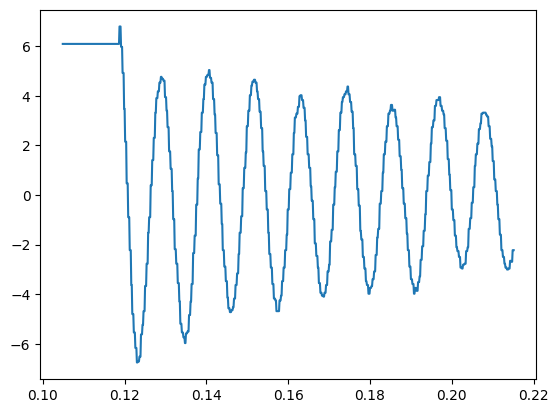

In [38]:
plt.plot(relevant_data['Time (s)'].values, relevant_data['EndPoint_X(um)'].values, label = 'EndPoint_X(um)')

In [16]:
#Time has fixed interval of 0.000125 seconds, (sampling rate of 8000 hz)

8000.0

In [35]:
fourier = np.fft.fft(relevant_data['EndPoint_X(um)'].values)

magnitude = np.abs(fourier)

timestep = 0.000125

freq = np.fft.fftfreq(len(fourier), d = timestep)

pos_freq = freq[freq > 0]

pos_magnitude = magnitude[freq > 0]

# Doubling the magnitudes, excluding the DC component
pos_magnitude[1:] = pos_magnitude[1:] * 2

#should not double nyquist frequency if number of samples is even
if len(pos_magnitude) % 2 == 0:
    pos_magnitude[-1] = pos_magnitude[-1] / 2

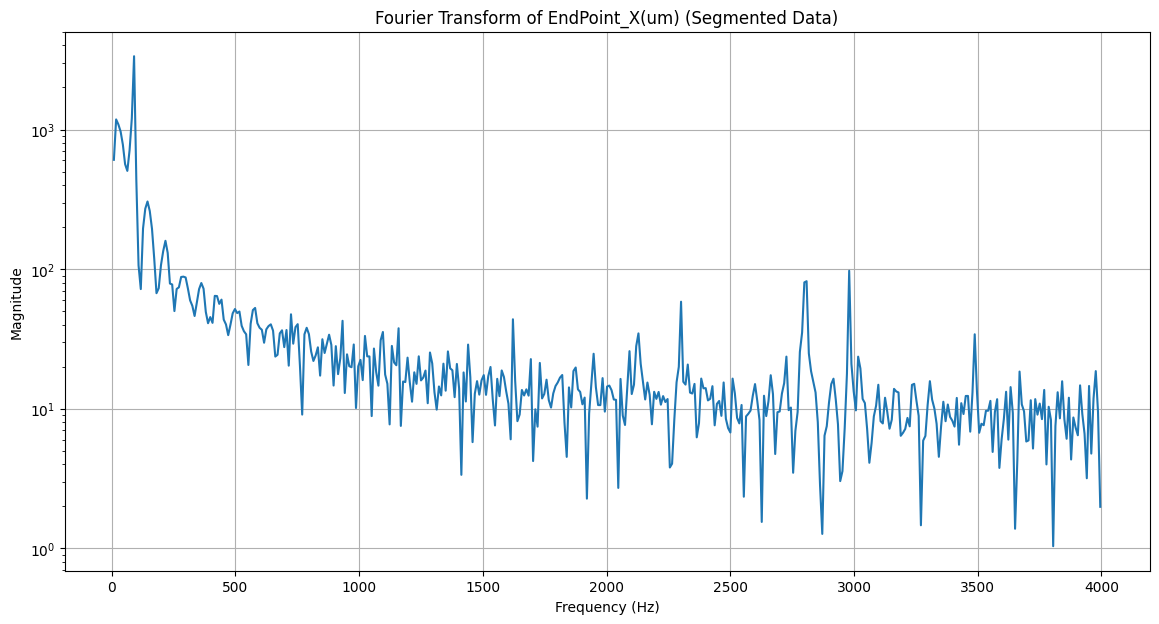

In [36]:
# plt.plot(pos_freq, pos_magnitude)
plt.figure(figsize=(14, 7))
plt.plot(pos_freq, pos_magnitude)
plt.title('Fourier Transform of EndPoint_X(um) (Segmented Data)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.yscale('log')  # Using a logarithmic scale for better visibility
plt.grid(True)
plt.show()

In [49]:
#vibrations actually happen from ~0.119 seconds onwards
np.where(relevant_data['Time (s)'] >= 0.119)[0][0]

113

In [50]:
relevant_data = relevant_data.iloc[113:]

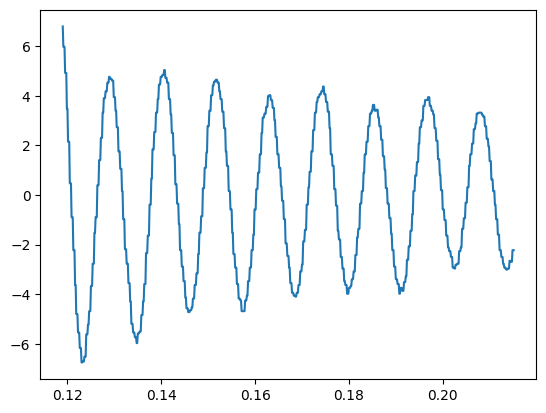

In [51]:
#Ok maybe we should actually start after the vibrations have started

#this happens at around 0.119 seconds onwards

plt.plot(relevant_data['Time (s)'].values, relevant_data['EndPoint_X(um)'].values, label = 'EndPoint_X(um)')

In [52]:
fourier = np.fft.fft(relevant_data['EndPoint_X(um)'].values)

magnitude = np.abs(fourier)

timestep = 0.000125

freq = np.fft.fftfreq(len(fourier), d = timestep)

pos_freq = freq[freq > 0]

pos_magnitude = magnitude[freq > 0]

# Doubling the magnitudes, excluding the DC component
pos_magnitude[1:] = pos_magnitude[1:] * 2

#should not double nyquist frequency if number of samples is even
if len(pos_magnitude) % 2 == 0:
    pos_magnitude[-1] = pos_magnitude[-1] / 2

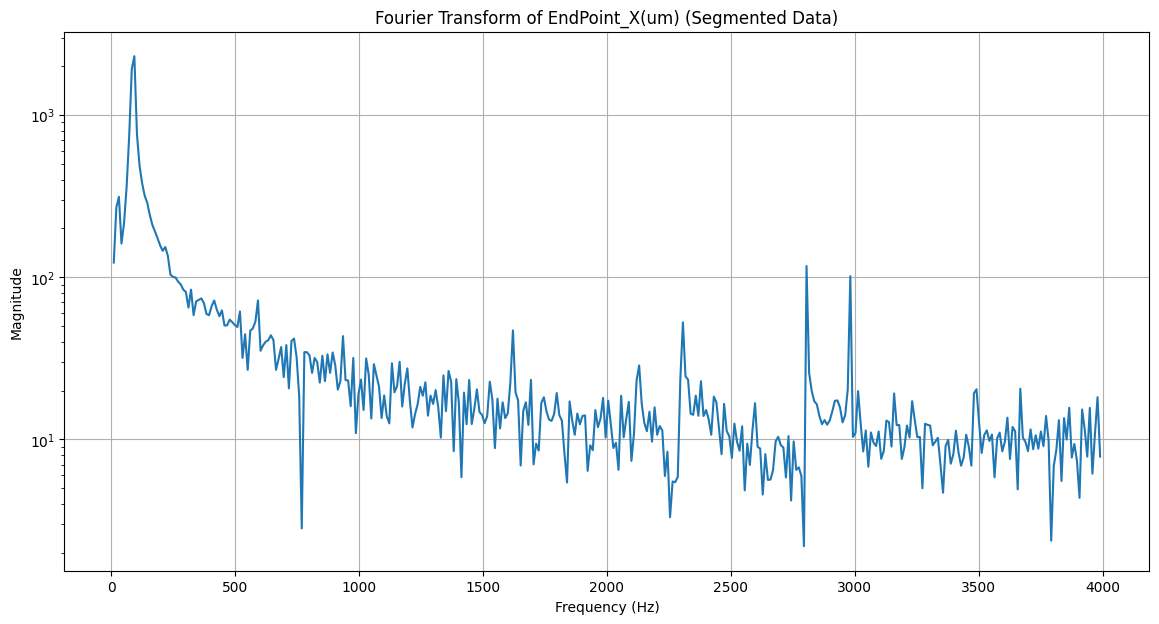

In [53]:
# plt.plot(pos_freq, pos_magnitude)
plt.figure(figsize=(14, 7))
plt.plot(pos_freq, pos_magnitude)
plt.title('Fourier Transform of EndPoint_X(um) (Segmented Data)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.yscale('log')  # Using a logarithmic scale for better visibility
plt.grid(True)
plt.show()

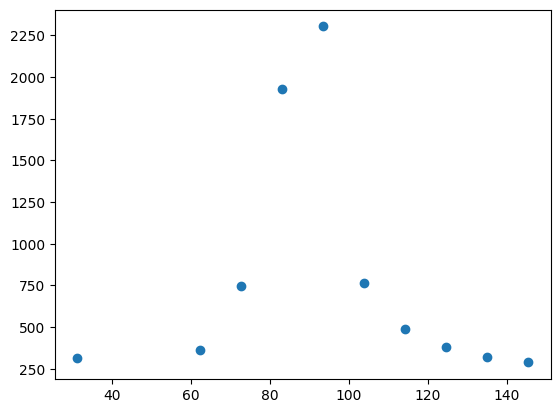

In [59]:
#lets get the dominant frequencies from this data and the corresponding magnitude

indx = np.argsort(pos_magnitude)[::-1][:10]

dominant_freq = pos_freq[indx]
dominant_magnitude = pos_magnitude[indx]

plt.scatter(dominant_freq, dominant_magnitude)



In [62]:
dominant_freq, dominant_magnitude

(array([ 93.50649351,  83.11688312, 103.8961039 ,  72.72727273,
        114.28571429, 124.67532468,  62.33766234, 135.06493506,
         31.16883117, 145.45454545]),
 array([2303.39470981, 1929.08548996,  763.50980787,  748.95865718,
         489.13346012,  380.15273284,  363.26384091,  318.40592974,
         313.11869899,  287.58395968]))

In [63]:
#what was the dc freqency?

pos_freq[0]

10.38961038961039

In [64]:
#ok so we have the dominant frequency, 93.5 Hz

#lets plot this now

1/0.01

100.0

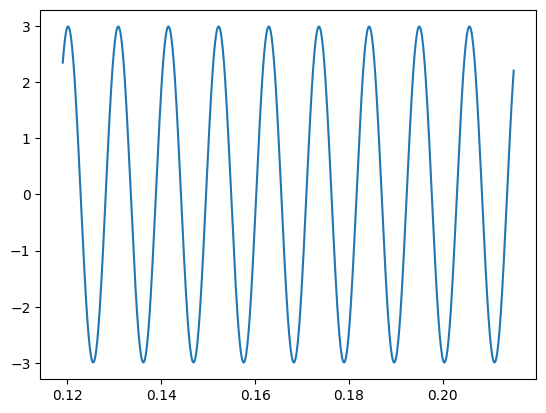

In [103]:
#ok we gonna just isolate the highest frequency, and then inverse fft

fourier = np.fft.fft(relevant_data['EndPoint_X(um)'].values)

magnitude = np.abs(fourier)

indxs = np.argsort(magnitude)[::-1][:2] #poth positive and negative index

isolated = np.zeros(len(fourier), dtype = complex)

isolated[indxs] = fourier[indxs]

plt.plot(relevant_data["Time (s)"].values, np.fft.ifft(isolated).real)


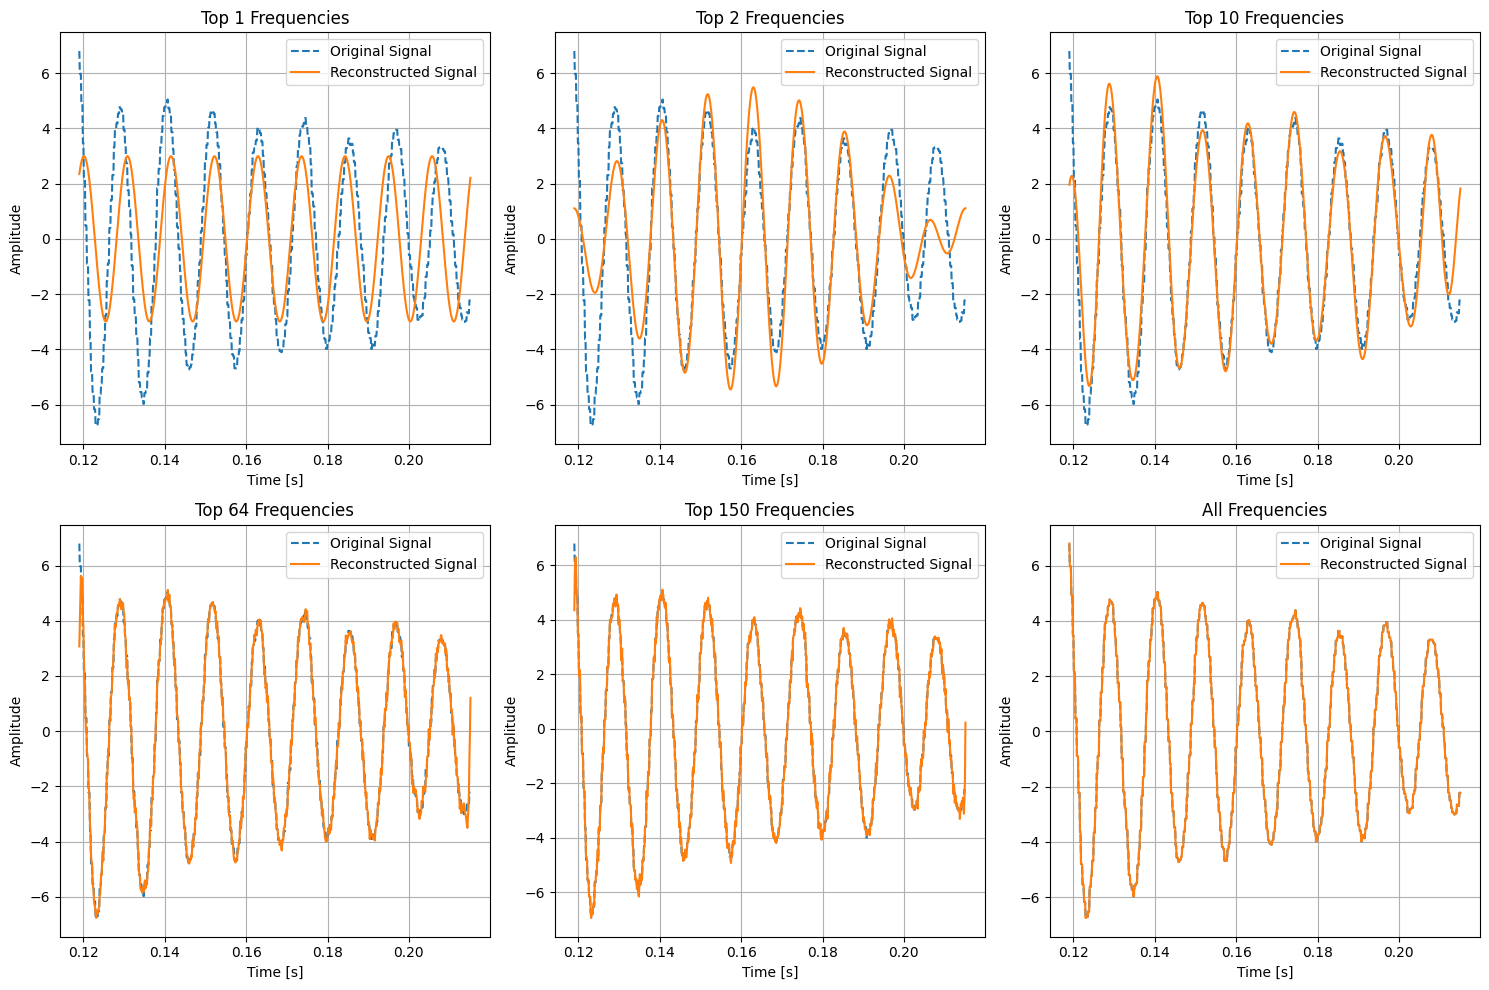

In [104]:
#plotting the original signal and the reconstructed signal based on number of isolated frequencies

n_frequencies_list = [1, 2, 10, 64, 150, 9999] 

# Creating 2x3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2x3 matrix to a vector for easier indexing


# Looping through the subplots
for i, n_frequency in enumerate(n_frequencies_list):

    n_indices = n_frequency * 2  # Doubling the number of indices to account for negative frequencies
    
    # Isolating the top n_indices frequencies
    indxs = np.argsort(magnitude)[::-1][:n_indices]
    isolated = np.zeros(len(fourier), dtype=complex)
    isolated[indxs] = fourier[indxs]
    
    # Compute IFFT of the isolated frequencies
    reconstructed_signal = np.fft.ifft(isolated).real
    
    # Plotting original and reconstructed signals
    axs[i].plot(relevant_data["Time (s)"].values, relevant_data['EndPoint_X(um)'].values, label='Original Signal', linestyle='dashed')
    axs[i].plot(relevant_data["Time (s)"].values, reconstructed_signal, label='Reconstructed Signal', linestyle='solid')
    axs[i].legend()
    axs[i].set_xlabel('Time [s]')
    axs[i].set_ylabel('Amplitude')
    if n_frequency == 9999:
        axs[i].set_title('All Frequencies')
    else:
        axs[i].set_title(f'Top {n_frequency} Frequencies')
    axs[i].grid(True)

# Adjusting the layout and showing the plots
plt.tight_layout()
plt.show()